**Семинар по Python**

*Общие сведения*

In [1]:
print('Hello, otd 7!')

Hello, otd 7!


In [2]:
import sys

Все сущности, создаваемые в Python - объекты, отдельные классы.
Поэтому у каждой есть втроенные методы. Даже у обычного int 

In [3]:
int(5).bit_length()

3

Размер int может динамически меняться. 
Целые числа реализованы с использованием long в C, что дает им по крайней мере 32-битную точность (sys.maxint всегда устанавливается на максимальное значение целого числа для текущей платформы; минимальное значение -sys.maxint - 1). Длинные целые числа имеют неограниченную точность.
Несколько версий языка назад типы int  и long были рызными и можно было мат. операциями переполнить int в long.
Сейчас эти типы объединены и есть только int.

In [ ]:
# Количество бит, необоходимое для двоичной записи числа
print(int(5).bit_length()) 
print(int(123456).bit_length())
print(int(1234567891346).bit_length())
print('=============================')
print(type(123))
print(type(123456678990554654654566756))

3
17
41
<class 'int'>
<class 'int'>


**Строки**

In [ ]:
# Строки в python опредеделяются путем использования кавычек
# В python нет разницы между одиночными ' кавыяками и двойными " (конечно, используемые пары должны быть одного типа)
a = 'Hello'
b = "Hello"
c = "'Hello'"
d  = str(1e-5) 
print(a)
print(b)
print(c)
print(d)

# строки можно складывать и умножать
print(a + b)
print(a*5)

Hello
Hello
'Hello'
1e-05
HelloHello
HelloHelloHelloHelloHello


In [ ]:
# в Python есть "усовершенствованный тип" строки  - f-строка, позволяющая удобно 
# собирать строку из разных типов или вычисляемых выражений 
f_string = f'Пример f-строки: берем чиселки {1454*1.24654}, берем непонятную строку {"dsf"*5}'
print(f_string)

# в послених версиях языка появилась возможность использовать f-строки для вывода имени переменной и ее значения
print('\nкак делали раньше (или как делается в с++)')
print(f'f_string = {f_string}')
print('f_string = {}'.format(f_string))

print('\nкак можно делать в python 3.9 и выше')
print(f'{f_string = }') 


Пример f-строки: берем чиселки 1812.4691599999999, берем непонятную строку dsfdsfdsfdsfdsf

как делали раньше (или как делается в с++)
f_string = Пример f-строки: берем чиселки 1812.4691599999999, берем непонятную строку dsfdsfdsfdsfdsf
f_string = Пример f-строки: берем чиселки 1812.4691599999999, берем непонятную строку dsfdsfdsfdsfdsf

как можно делать в python 3.9 и выше
f_string = 'Пример f-строки: берем чиселки 1812.4691599999999, берем непонятную строку dsfdsfdsfdsfdsf'


**Списки**

In [ ]:
a_zero_lst = list()
a_lst = [1,2,3,4]
print(f'{a_zero_lst}\n{a_lst}')


[]
[1, 2, 3, 4]


In [ ]:
a = [1,2,3]
b = [[4,5,6],[7,8,9]]
a + b

[1, 2, 3, [4, 5, 6], [7, 8, 9]]

Когда вы пишите для контейнеров и сложных объектов b = a, на самом деле это b = &a.
Т.е. получается псевдоним для ссылки на ту же область памяти.
Для "обычных" типов (не контейнеров), "=" работает как обычное присвоение.

In [ ]:
a[0] = b
a

[[[4, 5, 6], [7, 8, 9]], 2, 3]

In [ ]:
b[0] = ['ha-ha']
a

[[['ha-ha'], [7, 8, 9]], 2, 3]

Для "правильного" копирования объектов нужно использовать встроенный метод .copy()
Его также следует определить для кастомных классов.

In [ ]:
c = ['copy']
b[0] = c.copy()
c[0] = ['troble', 'times']
b

[['copy'], [7, 8, 9]]

In [ ]:
a = [[[1],[2],[3]], [[4], [5], [6]]]
b = a.copy()
print(a)
b[0][0] = [7,8,9]
print(a)

[[[1], [2], [3]], [[4], [5], [6]]]
[[[7, 8, 9], [2], [3]], [[4], [5], [6]]]


.copy() делает копию только первого уровня объектов. 
Если требуется полное рекурсивное копирование, то используется функция deepcopy() из библиотеки copy

In [ ]:
from copy import deepcopy

In [ ]:
a = [[[1],[2],[3]], [[4], [5], [6]]]
b = deepcopy(a)
print(a)
b[0][0] = [7,8,9]
print(a)

[[[1], [2], [3]], [[4], [5], [6]]]
[[[1], [2], [3]], [[4], [5], [6]]]


Кортежи - неизменяемый контейнер

In [ ]:
tuple_a = (1, 2, 3)
tuple_b = tuple([4, 5, 6])

In [ ]:
# попробуем изменить элемент кортежа
try:
    tuple_a[0] = 10
except TypeError as terr:
    print(terr)

'tuple' object does not support item assignment


In [ ]:
# подробоные tracebacks
import traceback

try:
    tuple_a[0] = 10
except:  # равносильно catch(...) в с++ Но правильнее указывать конкретный тип ошибки. Рекомендуется использовать такой вариант лишь для отладки. 
    print('Обработчик исключения: ')
    print(traceback.format_exc())

Обработчик исключения: 
Traceback (most recent call last):
  File "/tmp/ipykernel_6746/1301020217.py", line 5, in <cell line: 4>
    tuple_a[0] = 10
TypeError: 'tuple' object does not support item assignment



In [ ]:
list_a = [6, 7, 8]
list_b = [3, 4, 5]
tuple_a = (tuple_a, tuple_b)
print(tuple_a)

((1, 2, 3), (4, 5, 6))


In [ ]:
# попробуем провернуть тот же фокус с сылками, что делали с вложенными списками
list_a[0] = 111
print(tuple_a)

list_a = [111, 111, 111]
print(tuple_a)

((1, 2, 3), (4, 5, 6))
((1, 2, 3), (4, 5, 6))


In [3]:
# Обратите внимание, что все основные контейнеры в python, типа [],(),{} - гетерогенные, т.е. могут содержать разные типы 
# тогда как в c++ гетерогенный только tuple
a = ['string', 1.2, [1,2,3], 5]
b = {'string', 1.2, (1,2,3), 5}
c = ('string', 1.2, [1,2,3], 5)
abc_list = [a, b, c]

for conteiner in abc_list:
    print(f'\nКонтейнер типа {type(conteiner)}:')
    for el in conteiner:
        print(type(el))


Контейнер типа <class 'list'>:
<class 'str'>
<class 'float'>
<class 'list'>
<class 'int'>

Контейнер типа <class 'set'>:
<class 'str'>
<class 'int'>
<class 'float'>
<class 'tuple'>

Контейнер типа <class 'tuple'>:
<class 'str'>
<class 'float'>
<class 'list'>
<class 'int'>


Словари

In [ ]:
dict_example = {'one': 1, 
                'two': 2,
                'three': 3}
print(dict_example['one'])

1


In [ ]:
# Проверка на наличие элемента
if 'one' in dict_example.keys():
    print('Bingo!')

Bingo!


В качестве ключа в словаре может быть любой хешиуемый объект.
Отсюда очевидно, что словарь - несортированная коллекция с быстрым доступом к значениям.

In [ ]:
# альтернативный способ задания словарей
# функция zip формирует кортежи из элементов-пар первого аргемента и второго
d = dict(zip([1,2,3], [4,5,6]))
print(d)

{1: 4, 2: 5, 3: 6}


Множества - неупорядоченный контейнер, нельзя обращаться к конкретным элементам. Все элементы встречаются только 1 раз

In [ ]:
set_a = {1, 2, 3, 3, 3, 3, 4}
print(set_a)

set_b = {'H', 'e', 'l', 'l', 'o'}
print(set_b)

{1, 2, 3, 4}
{'l', 'o', 'H', 'e'}


In [ ]:
set_a.union(set_b)

{1, 2, 3, 4, 'H', 'e', 'l', 'o'}

Циклы

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
a = ['a', 'b', 'c']
for sym in a:
    print(sym)

a
b
c


In [ ]:
i = 0
while i < 5:
    print(i)
    i += 1

0
1
2
3
4


Массивы

In [ ]:
from numpy import array

array_a = array([1,2,3,4])
print(array_a)

[1 2 3 4]


Генераторы

In [ ]:
# способ зполнить контейнер
a = []
for i in range(5):
    a.append(i)
print(a)


[0, 1, 2, 3, 4]


In [ ]:
#способ задания с помощью генератора
a = [ i for i in range(5)]
print(a)

[0, 1, 2, 3, 4]


*Генераторы работают **БЫСТРЕЕ** циклов!*

In [ ]:
# попробуем что-то посложнее
from datetime import datetime
from random import randint

In [ ]:
# количетсво элементов в списке задается случайнм образом и будет отличаться при каждом выполнении кода
microsec_lst = [datetime.now().microsecond for i in range(randint(2, 10))]
print(microsec_lst)

[215795, 215803, 215804, 215805, 215805, 215806]


Функции

In [ ]:
def test_func(text):
    print(text)

In [ ]:
test_func(1)
test_func([1, 3, 4])
test_func('asgdjlkajskldgj')

1
[1, 3, 4]
asgdjlkajskldgj


In [ ]:
# Правила "хорошего тона" оформления функций
def pritty_func(text: str) -> None:
    print(text)

В python НЕТ void функций! Если явно не задан return, то функция возвращает None в случае успешного выполнения

In [ ]:
def non_void_func():
    print('Hi')

res = non_void_func()
print(res)

Hi
None


In [ ]:
# возвращение нескольких значений из функции
def several_return_func(a, b, c):
    return a**2, b**3, c**4 # ** - возведение в степень

r1, r2, _ = several_return_func(2, 3, c = 4) # если возвращаемое значение не нужно, принято в качетсве имени переменной использовать "_"
print(r1, r2, _)
# фунция вернула кортеж, полсе чего декомпозировала по переменным r1, r2, _
# посмотрим возвращаемый тип
print(type(several_return_func(1,2,3)))



4 27 256
<class 'tuple'>


**Немного прикладного функционала для настроения**

Построение графиков

In [ ]:
# самая простая, но самая близкая к матлабу библиотека для графиков - matplotlib.pyplot (модуль pyplot из библиотеки matplotlib)
import matplotlib.pyplot as plt
from random import random

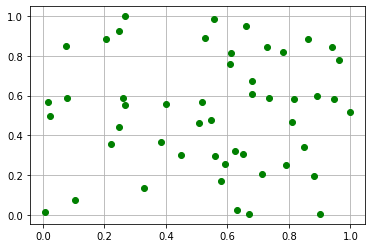

In [ ]:
x = [random() for i in range(50)]
y = [random() for i in range(50)]
plt.plot(x,y, 'og')
plt.grid()

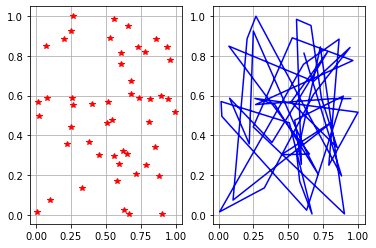

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, '*r')
ax1.grid()

ax2.plot(x, y, 'b')
ax2.grid()

# fig.show() # при написании gui нужна отдельная команда ддя показа

3D графики

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

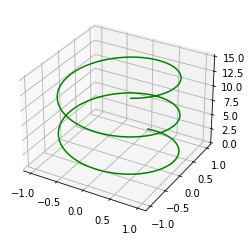

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'g')

Работа с файлами

In [ ]:
# w+ - атрибут открытия для записи (саоздает файл, если его нет)
with open('test.txt', 'w+') as input_file: 
    input_file.write('1st text file!\n')
    input_file.writelines(['Second strging\n', 'Third string\n'])

print('Первое чтение файла: ')
with open('test.txt', 'r') as output_file:
    content = output_file.readlines() # возвращает list
    print(content)

# a+ - атибут открытия на дозапись, создает файл, если его нет
with open('test.txt', 'a+') as input_file: 
    input_file.write('Lets try again')

print('\nВторое чтение файла: ')
with open('test.txt', 'r') as output_file:
    for line in output_file.readlines():
        print(line)


Первое чтение файла: 
['1st text file!\n', 'Second strging\n', 'Third string\n']

Второе чтение файла: 
1st text file!

Second strging

Third string

Lets try again



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('Interface_2021.xlsx')
data

,Unnamed: 0,Экспортированная таблица,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,"Журнал группы ИВТ-31 (2019 г., бакалавры) по д...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Семестр,"2021 - 2022 год, 1 семестр",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Общая сумма баллов,Текущая сумма баллов,Текущая оценка
2,NaN,Неделя:,2,NaN,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,17,Итог,NaN,NaN,NaN
3,NaN,Название:,"Логические операции, кодирование",Протокол обмена,NaN,SPI I2C,UART RS,NaN,USB - МПК,Лабораторная работа 1,...,NaN,NaN,NaN,NaN,NaN,Проектирование вычислительной системы,NaN,NaN,NaN,NaN
4,NaN,Тип КМ:,СР.1,Вариант,КЗ.1,СР.2,СР.3,А/П.1,СР.4,ЛР.1,...,Вариант ИДЗ,Первый этап,Второй Этап,Третий этап,Четвертый этап,КМ.1,Итог,NaN,NaN,NaN
5,н п/п,Балл:,4,NaN,5,4,4,2,4,10,...,NaN,2,3,7,6,18,21,100,0,NaN
6,1,Аксенов Иван Александрович,2,5,4,4,4,NaN,4,7,...,2.1,2,3,5,2,12,NaN,0,0,0
7,2,Бантуров Николай Сергеевич,4,4,5,1,3,NaN,3,10,...,1.3,2,2,1,2,7,NaN,0,0,0
8,3,Винокурова Елена Михайловна,3,5,4,2,3,NaN,3.5,1,...,8.2,2,3,4,4,13,NaN,0,0,0
9,4,Громов Артем Алексеевич,4,7,5,2021-05-01 00:00:00,3,NaN,4,1,...,7.4,NaN,NaN,NaN,NaN,0,NaN,0,0,0


Домашнее задание: 

1.  Создайте по одной переменной типа list, tuple, str. Выведете их с помощью одной команды print друг под другом, используя f-строки. 
2.	Создайте телефонную книгу на 5 контактов с помощью словаря. Ключ - Имя, значение -  телефон. 
3.	С помощью цикла for выведите только те контакты, длина имени которых больше 5.
Формат вывода: «Имя: Василий; Телефон: +79109776655»
4.	Напишите функцию my_div(a, b, zero_mode=False), принимающую 3 аргумента Функция должна выполнять операцию деления a / b.
В случае деления на ноль при zero_mode =  False, выводится сообщение «Деление на 0». В случае деления на ноль при zero_mode = True, возвращается значение inf. Придумайте решение с использованием try – except. Функция не должна выдавать ломаться даже при неверных входных данных.
*для использования inf необходимо подключить библиотеку numpy (import numpy as np)


№1
1.  Создайте по одной переменной типа list, tuple, str. Выведете их с помощью одной команды print друг под другом, используя f-строки.

In [6]:
a_list = [1,2,2,2]
b_tuple = (1,2,2,2)
c_str = '1222'
print(f'{a_list}\n{b_tuple}\n{c_str}')

[1, 2, 2, 2]
(1, 2, 2, 2)
1222


№2
2.	Создайте телефонную книгу на 5 контактов с помощью словаря. Ключ - Имя, значение -  телефон. 

In [8]:
a_dict = {  'Дмитрий'   : 89258896637, 
            'Дима'      : 89258896638, 
            'Митя'      : 89258896639, 
            'Димитрий'  : 89258896640,
            'Димуша'    : 89258896641}
print(a_dict)

{'Дмитрий': 89258896637, 'Дима': 89258896638, 'Митя': 89258896639, 'Димитрий': 89258896640, 'Димуша': 89258896641}


№3
3.	С помощью цикла for выведите только те контакты, длина имени которых больше 5.
Формат вывода: «Имя: Василий; Телефон: +79109776655»

In [10]:
for name in a_dict.keys():
    if len(name) > 5:
        print(a_dict[name])

89258896637
89258896640
89258896641


№4
4. Напишите функцию my_div(a, b, zero_mode=False), принимающую 3 аргумента Функция должна выполнять операцию деления a / b.
В случае деления на ноль при zero_mode =  False, выводится сообщение «Деление на 0». В случае деления на ноль при zero_mode = True, возвращается значение inf. Придумайте решение с использованием try – except. Функция не должна выдавать ломаться даже при неверных входных данных.
*для использования inf необходимо подключить библиотеку numpy (import numpy as np)

In [15]:
import numpy as np

def my_div(a, b, zero_mode=False):
    if zero_mode == False and b == 0:
        c = None
        print('Деление на 0')
    elif zero_mode == True and b == 0:
        c = 'inf'
    else:
        c = a/b
    return c

print(my_div(5, 0, True), '\n' , my_div(5, 0, False), '\n', my_div(5, 5, True))
         

Деление на 0
inf 
 None 
 1.0
